In [35]:
#####========================================= Import Libraries ============================================================
import re
import pandas as pd
import numpy as np
import scipy
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.util import bigrams 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import warnings
warnings.filterwarnings("ignore")
from nltk.tokenize import RegexpTokenizer

In [36]:
df = pd.read_csv('Cleaned_data.csv')

In [37]:
gen_df = df[(df['fraudulent'] == 'f')]
gen_df = pd.DataFrame(gen_df)
gen_df.shape

(17014, 3)

In [38]:
fraud_df = df[(df['fraudulent'] == 't')]
fraud_df = pd.DataFrame(fraud_df)
fraud_df.shape

(866, 3)

In [39]:
# Set seed for reproducibility
import random; random.seed(53)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

In [40]:
df.columns

Index(['Unnamed: 0', 'fraudulent', 'text'], dtype='object')

In [41]:
from random import shuffle
#fraud_list = list(fraud_df['text'])
#fraud_df['text'].shuffle()
#fraud_list


dataList = [] #empty list
for index, row in fraud_df.iterrows(): 
    mylist = [row.text]
    dataList.append(mylist)

In [42]:
len(dataList)

866

In [43]:
from random import shuffle
x = [[i] for i in dataList]
shuffle(x)

In [ ]:
x

In [28]:
len(x)

866

In [49]:
for i in dataList[:]:
    i = i[20:]

In [ ]:
x

In [73]:
a = df.append([fraud_df]*5,ignore_index=True)

In [74]:
a.shape

(22210, 3)

In [76]:
df.shape

(17880, 3)

Genuine: 17014
Fraudulent: 866
Proportion: 19.65 : 1


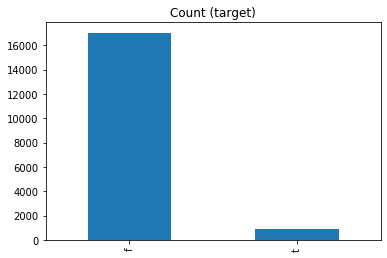

In [78]:
# Create target
y = df['fraudulent']
target_count = y.value_counts()
print('Genuine:', target_count[0])
print('Fraudulent:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [79]:
# Set seed for reproducibility
import random; random.seed(53)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

In [86]:
from matplotlib import pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figure=0):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figure)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [80]:
import pandas as pd

# Create target
y = df['fraudulent']
X = df['text']
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=53)

In [84]:
# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", min_df=0.05, max_df=0.9)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [85]:
# Create a MulitnomialNB model
tfidf_nb = MultinomialNB()

# Training the model
tfidf_nb.fit(tfidf_train,y_train)

# Getting predictions
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Accuracy
tfidf_nb_score = metrics.accuracy_score(tfidf_nb_pred,y_test)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)

NaiveBayes Tfidf Score:  0.9558165548098434


Confusion matrix, without normalization


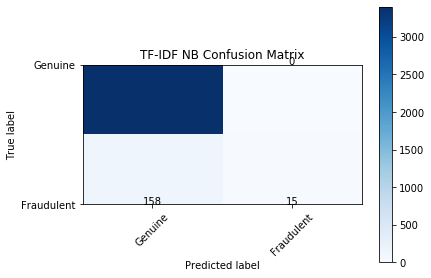

In [87]:
# Calculate the confusion matrices for the tfidf_nb model
tfidf_nb_cm = metrics.confusion_matrix(y_test, tfidf_nb_pred)

# Plot the tfidf_nb_cm confusion matrix
plot_confusion_matrix(tfidf_nb_cm, classes=['Genuine','Fraudulent'], title="TF-IDF NB Confusion Matrix")

LinearSVC Score:   0.969
Confusion matrix, without normalization


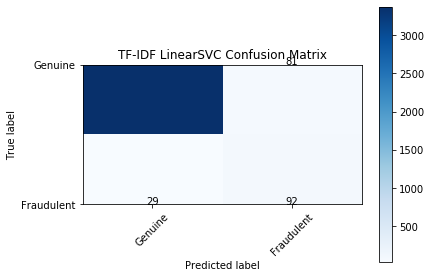

In [88]:
# Creating LinearSVC Model
tfidf_svc = LinearSVC()

# Training
tfidf_svc.fit(tfidf_train,y_train)

# Prediction
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Accuracy
tfidf_svc_score = metrics.accuracy_score(tfidf_svc_pred,y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Confusion Matrix
svc_cm = metrics.confusion_matrix(tfidf_svc_pred,y_test)

# Plot the confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(svc_cm, classes=['Genuine','Fraudulent'], title="TF-IDF LinearSVC Confusion Matrix")

In [89]:
tfidf_nb_cm

array([[3403,    0],
       [ 158,   15]], dtype=int64)

In [90]:
svc_cm

array([[3374,   81],
       [  29,   92]], dtype=int64)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=15):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
cv = CountVectorizer()
cv.fit(X)
len(cv.vocabulary_)
cv.get_feature_names()
X_train = cv.transform(X)

svm = LinearSVC()
svm.fit(X_train, y)
plot_coefficients(svm, cv.get_feature_names())

In [91]:
df_aug = a

In [92]:
df_aug.shape

(22210, 3)

In [94]:
import pandas as pd

# Create target
y_aug = df_aug['fraudulent']
X_aug = df_aug['text']
# Split training and testing data
X_train_aug, X_test_after, y_train_aug, y_test_after = train_test_split(X_aug, y_aug, test_size=0.2, stratify=y_aug, random_state=53)

In [95]:
y.shape

(17880,)

In [96]:
X.shape

(17880,)

In [97]:
y_aug.shape

(22210,)

In [98]:
X_aug.shape

(22210,)

In [99]:
# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", min_df=0.05, max_df=0.9)

# Create tfidf train and test variables
tfidf_train_aug = tfidf_vectorizer.fit_transform(X_train_aug)

In [100]:
X_test

2955     client swedish game studio developing innovati...
9217     currently recruiting exciting sale amp custome...
1143     taxibeat looking person help revolutionize tax...
1140     government funding available 16 18 year old pe...
12359    currently recruiting exciting sale amp custome...
                               ...                        
16767    position software build engineer job type perm...
15042    jdi missionto help company grow reach revenue ...
12957    looking highly skilled security engineer join ...
7752     optometric practice seeking full time optical ...
78       one manager position per city region open righ...
Name: text, Length: 3576, dtype: object

In [101]:
X_test_after

2692     seeking person passion energy genuine interest...
22190    position manager business solution sap supply ...
9800     mni news organization reporter around world re...
2234     transferwho transferwise vc backed internation...
6449     url_40db8ee573e5afc88001636e8ccb082c0d19fe854b...
                               ...                        
4227     pardon service canada premier legal service pr...
9261     currently vacancy java jee developer fluent en...
10478    shyp building 1 brand consumer small business ...
10687    servicetitanservicetitan world leading crm sof...
7635     software development team engine drive ambitio...
Name: text, Length: 4442, dtype: object

In [102]:
# Create a MulitnomialNB model
tfidf_nb = MultinomialNB()

# Training the model
tfidf_nb_aug.fit(tfidf_train_aug,y_train_aug)

# Getting predictions
tfidf_nb_pred = tfidf_nb_aug.predict(tfidf_test)

# Accuracy
tfidf_nb_score = metrics.accuracy_score(tfidf_nb_pred,y_test)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)

NaiveBayes Tfidf Score:  0.9477069351230425


In [ ]:
# Calculate the confusion matrices for the tfidf_nb model
tfidf_nb_cm = metrics.confusion_matrix(y_test, tfidf_nb_pred)

# Plot the tfidf_nb_cm confusion matrix
plot_confusion_matrix(tfidf_nb_cm, classes=['Genuine','Fraudulent'], title="TF-IDF NB Confusion Matrix")

LinearSVC Score:   0.951
Confusion matrix, without normalization


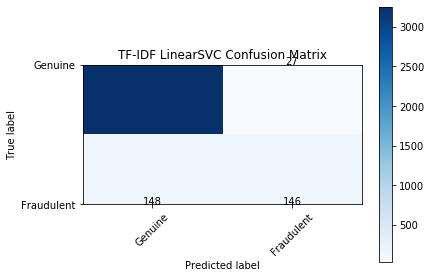

In [103]:
# Creating LinearSVC Model
tfidf_svc = LinearSVC()

# Training
tfidf_svc.fit(tfidf_train_aug,y_train_aug)

# Prediction
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Accuracy
tfidf_svc_score = metrics.accuracy_score(tfidf_svc_pred,y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Confusion Matrix
svc_cm = metrics.confusion_matrix(tfidf_svc_pred,y_test)

# Plot the confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(svc_cm, classes=['Genuine','Fraudulent'], title="TF-IDF LinearSVC Confusion Matrix")

In [105]:
tfidf_nb_cm

array([[3309,   94],
       [  93,   80]], dtype=int64)

In [106]:
svc_cm

array([[3255,   27],
       [ 148,  146]], dtype=int64)

Class 0: 17014
Class 1: 866
Proportion: 19.65 : 1


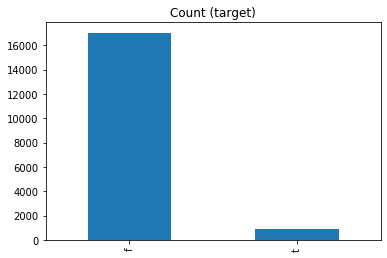

In [113]:
import numpy as np
import pandas as pd
df_train=df
#df_train = pd.read_csv('../input/train.csv')
y = df_train['fraudulent']
target = y
target_count = y.value_counts()
#target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [121]:
import pandas as pd

# Create target
y = df['fraudulent']
X = df['text']
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=53)

In [122]:
# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", min_df=0.05, max_df=0.9)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [123]:
# Create a MulitnomialNB model
tfidf_nb = MultinomialNB()

# Training the model
tfidf_nb.fit(tfidf_train,y_train)

# Getting predictions
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Accuracy
tfidf_nb_score = metrics.accuracy_score(tfidf_nb_pred,y_test)

#print('NaiveBayes Tfidf Score: ', tfidf_nb_score)

NaiveBayes Tfidf Score:  0.9558165548098434


In [124]:
tfidf_nb_cm = metrics.confusion_matrix(y_test, tfidf_nb_pred)

Confusion matrix:
 [[3403    0]
 [ 158   15]]


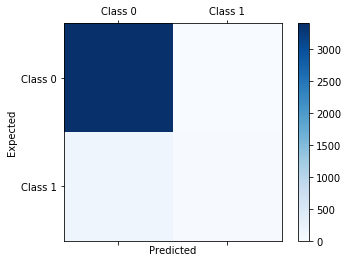

In [125]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=tfidf_nb_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [127]:
# Creating LinearSVC Model
tfidf_svc = LinearSVC()

# Training
tfidf_svc.fit(tfidf_train,y_train)

# Prediction
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Accuracy
tfidf_svc_score = metrics.accuracy_score(tfidf_svc_pred,y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Confusion Matrix
svc_cm = metrics.confusion_matrix(tfidf_svc_pred,y_test)

# Plot the confusion matrix using the plot_confusion_matrix function
#plot_confusion_matrix(svc_cm, classes=['Genuine','Fraudulent'], title="TF-IDF LinearSVC Confusion Matrix")

LinearSVC Score:   0.969


Confusion matrix:
 [[3374   29]
 [  81   92]]


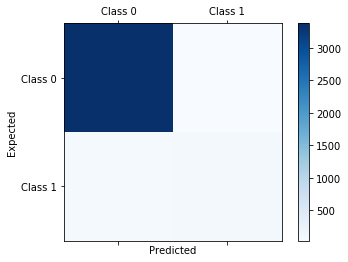

In [128]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=tfidf_svc_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [120]:
## After Augmentation

Genuine: 17014
Fraudulent: 5196
Proportion: 3.27 : 1


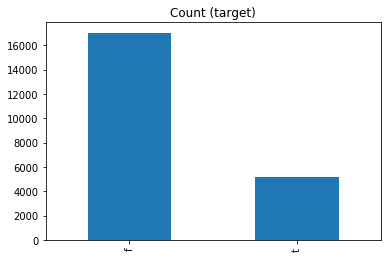

In [129]:
# Create target
y = a['fraudulent']
target_count = y.value_counts()
print('Genuine:', target_count[0])
print('Fraudulent:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Confusion matrix:
 [[3254  169]
 [ 148    5]]


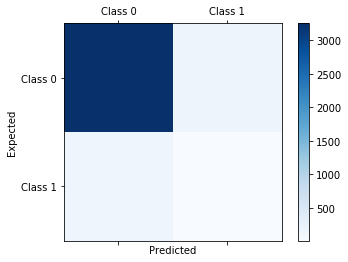

In [119]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=tfidf_nb_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Confusion matrix:
 [[3142  281]
 [ 140   13]]


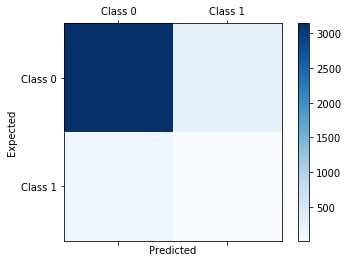

In [118]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=tfidf_svc_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()